# **FINAL PROJECT PCM -2 (FISH)**
**Oleh Nurul Annisa (5023221031)**

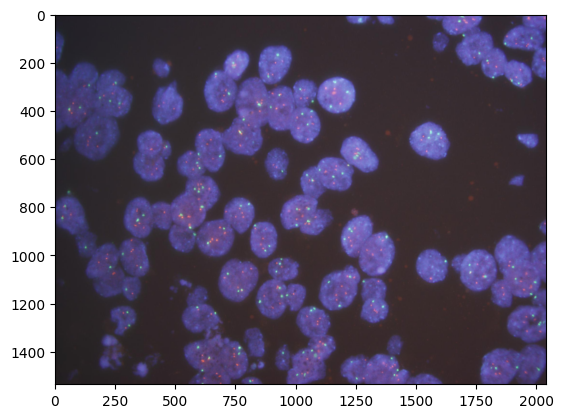

(dtype('uint8'), (1536, 2040, 3))

In [46]:
import imageio.v2 as imageio
from matplotlib import pyplot as plt
import numpy as np

# im = imageio.imread('FISH1.jpg')
# im = imageio.imread('FISH2.jpg')
im = imageio.imread('FISH3.jpg') #tolok awal
# im = imageio.imread('FISH4.jpg')
# im = imageio.imread('FISH5.jpg')
plt.imshow(im, cmap='gray')
plt.show()
im.dtype, im.shape

Text(0.5, 1.0, 'Histogram of raw FISH image')

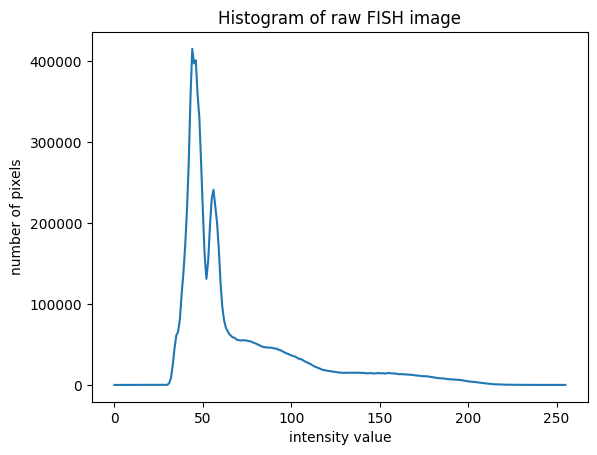

In [47]:
from skimage import exposure
import scipy.ndimage as ndi

histogram = ndi.histogram(im, min=0, max=255, bins=256)
plt.plot(histogram)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of raw FISH image')

**Analisis Histogram dari 3 channel RGB**

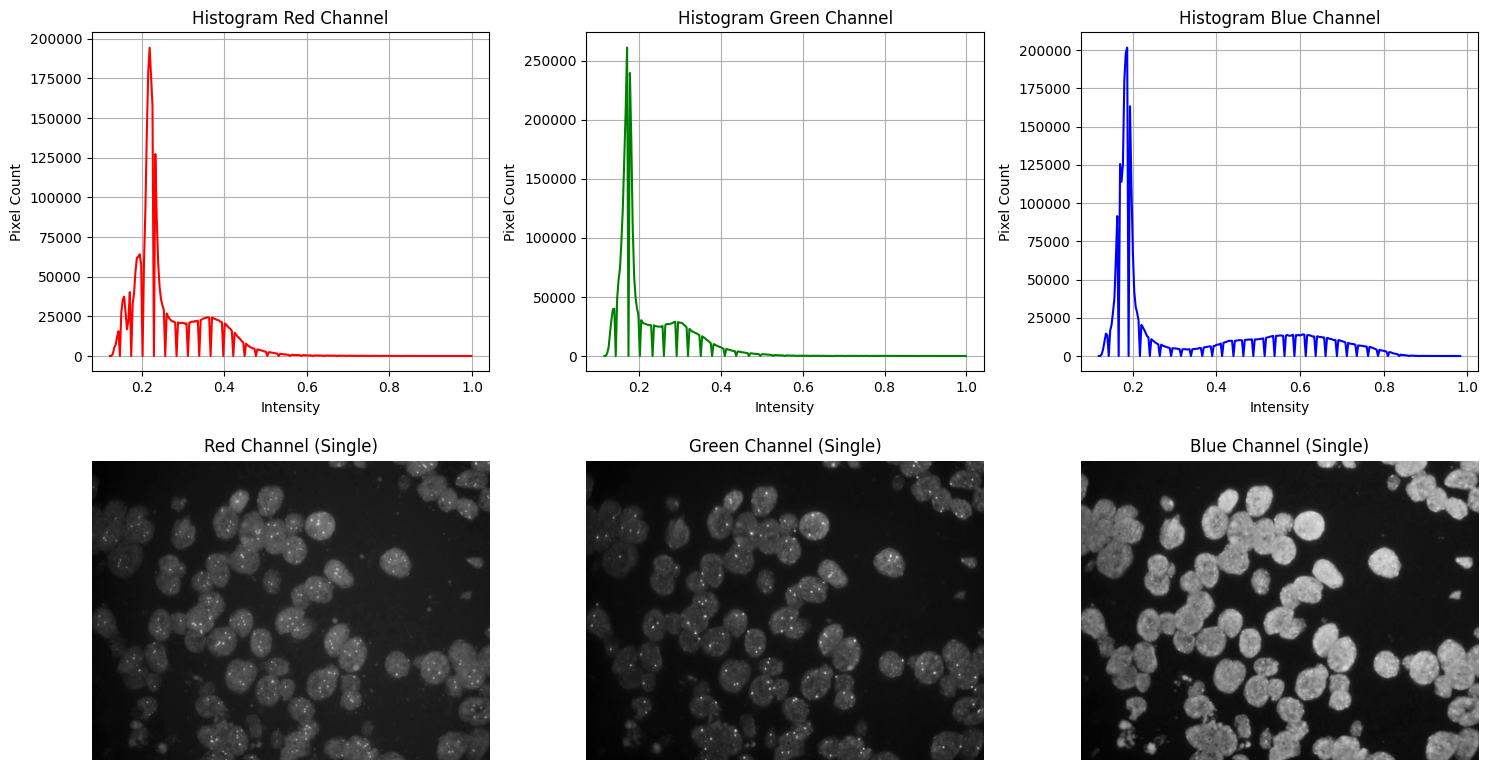

In [48]:
# Import pustaka
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

# Normalisasi jika perlu
if im.dtype != np.float32 and im.dtype != np.float64:
    image = im / 255.0
else:
    image = im

# Pisahkan channel
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

# Hitung histogram
hist_r, bins_r = exposure.histogram(r)
hist_g, bins_g = exposure.histogram(g)
hist_b, bins_b = exposure.histogram(b)

# Buat figure besar untuk histogram + gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# ---------------------
# Baris 1: Histogram
# ---------------------
axs[0, 0].plot(bins_r, hist_r, color='red')
axs[0, 0].set_title('Histogram Red Channel')
axs[0, 0].set_xlabel('Intensity')
axs[0, 0].set_ylabel('Pixel Count')
axs[0, 0].grid(True)

axs[0, 1].plot(bins_g, hist_g, color='green')
axs[0, 1].set_title('Histogram Green Channel')
axs[0, 1].set_xlabel('Intensity')
axs[0, 1].set_ylabel('Pixel Count')
axs[0, 1].grid(True)

axs[0, 2].plot(bins_b, hist_b, color='blue')
axs[0, 2].set_title('Histogram Blue Channel')
axs[0, 2].set_xlabel('Intensity')
axs[0, 2].set_ylabel('Pixel Count')
axs[0, 2].grid(True)

# ---------------------
# Baris 2: Gambar Per Channel
# ---------------------
# ---------------------
# Baris 2: Gambar Per Channel (Grayscale dari masing-masing channel)
# ---------------------
axs[1, 0].imshow(r, cmap='gray')
axs[1, 0].set_title('Red Channel (Single)')
axs[1, 0].axis('off')

axs[1, 1].imshow(g, cmap='gray')
axs[1, 1].set_title('Green Channel (Single)')
axs[1, 1].axis('off')

axs[1, 2].imshow(b, cmap='gray')
axs[1, 2].set_title('Blue Channel (Single)')
axs[1, 2].axis('off')

# Tata letak agar rapi
plt.tight_layout()
plt.show()


**ANALISIS DARI CHANNEL BLUE, KRN PALING TERLIHAT GAP UNTUK BACKGROUND DAN FOREGROUND**

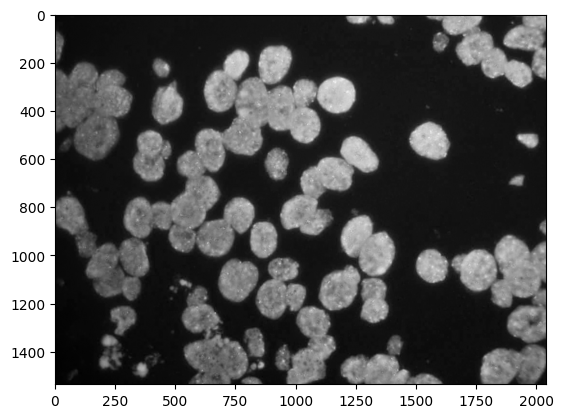

(dtype('float64'), (1536, 2040))

In [49]:
from matplotlib import pyplot as plt
import numpy as np

plt.imshow(b, cmap='gray')
plt.show()
b.dtype, b.shape

coba di preprocessing dengan clahe

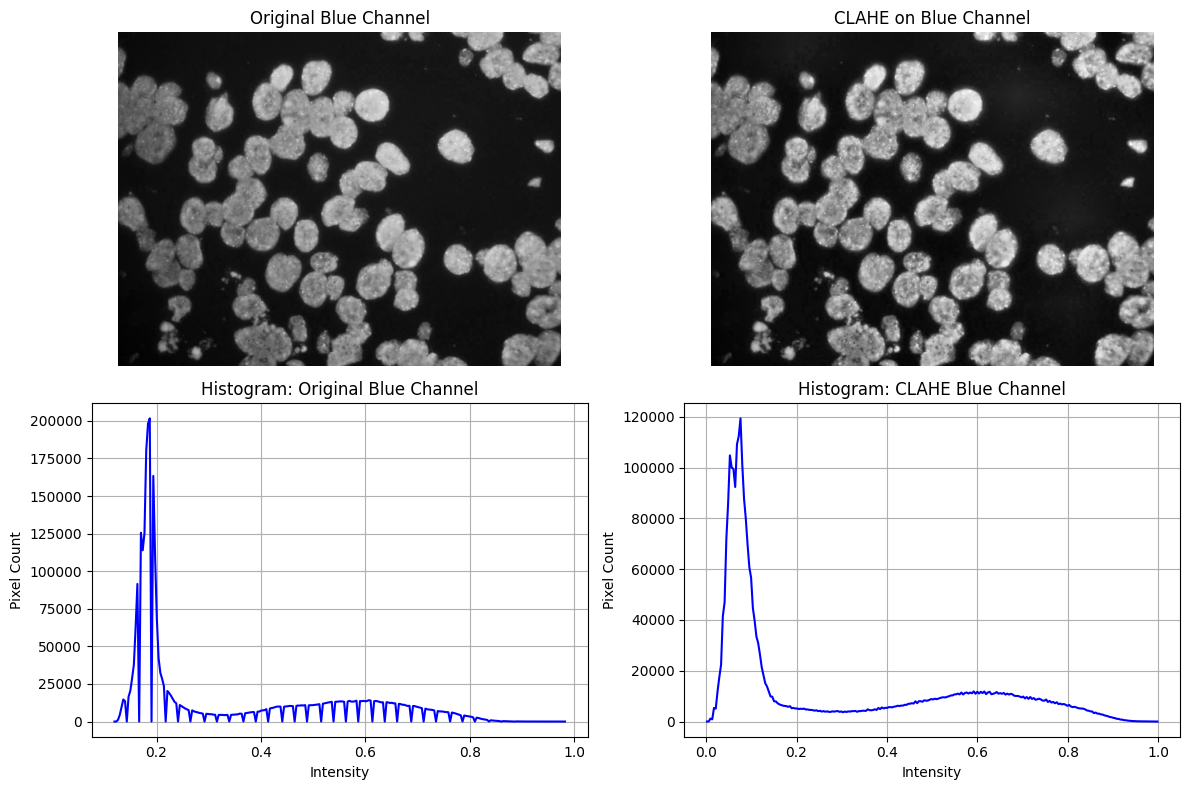

In [50]:
# CLAHE pada channel biru
b_clahe = exposure.equalize_adapthist(b, clip_limit=0.007)  # Bisa atur clip_limit

# Hitung histogram original dan CLAHE
hist_b, bins_b = exposure.histogram(b)
hist_clahe, bins_clahe = exposure.histogram(b_clahe)

# Plot citra dan histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gambar Blue Channel
axs[0, 0].imshow(b, cmap='gray')
axs[0, 0].set_title('Original Blue Channel')
axs[0, 0].axis('off')

# Gambar Blue Channel setelah CLAHE
axs[0, 1].imshow(b_clahe, cmap='gray')
axs[0, 1].set_title('CLAHE on Blue Channel')
axs[0, 1].axis('off')

# Histogram Original
axs[1, 0].plot(bins_b, hist_b, color='blue')
axs[1, 0].set_title('Histogram: Original Blue Channel')
axs[1, 0].set_xlabel('Intensity')
axs[1, 0].set_ylabel('Pixel Count')
axs[1, 0].grid(True)

# Histogram CLAHE
axs[1, 1].plot(bins_clahe, hist_clahe, color='blue')
axs[1, 1].set_title('Histogram: CLAHE Blue Channel')
axs[1, 1].set_xlabel('Intensity')
axs[1, 1].set_ylabel('Pixel Count')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

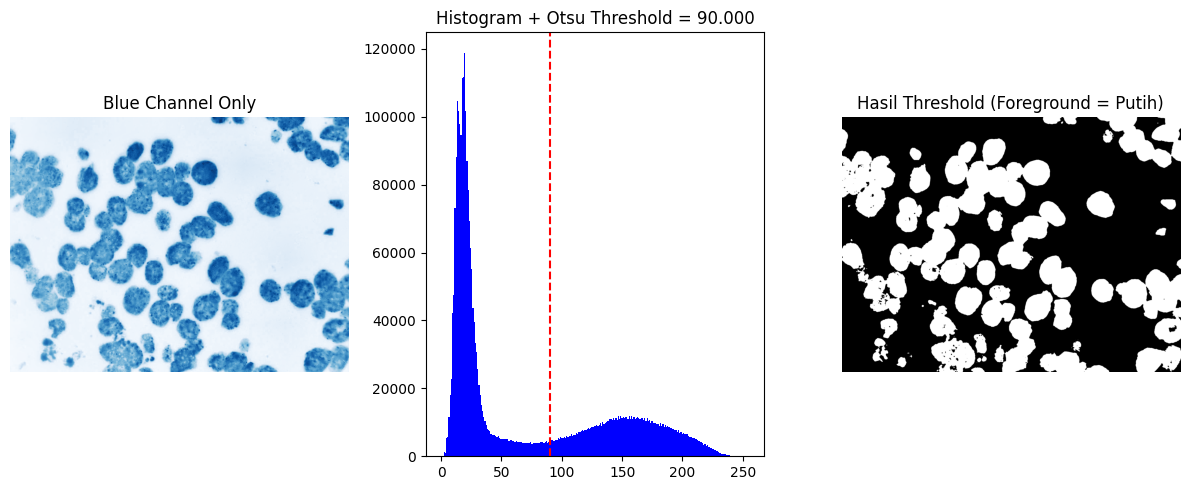

In [51]:
from skimage import io, filters
import matplotlib.pyplot as plt
import numpy as np

#konversi ke uint8 
b_uint = (b_clahe*255).astype(np.uint8)

# Thresholding dengan Otsu langsung di channel biru
thresh_val = filters.threshold_otsu(b_uint)
binary_mask = b_uint > thresh_val  # foreground = True

# Tampilkan hasil
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(b_uint, cmap='Blues')
plt.title('Blue Channel Only')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(b_uint.ravel(), bins=256, color='blue')
plt.axvline(thresh_val, color='red', linestyle='--')
plt.title(f'Histogram + Otsu Threshold = {thresh_val:.3f}')

plt.subplot(1, 3, 3)
plt.imshow(binary_mask, cmap='gray')
plt.title('Hasil Threshold (Foreground = Putih)')
plt.axis('off')

plt.tight_layout()
plt.show()

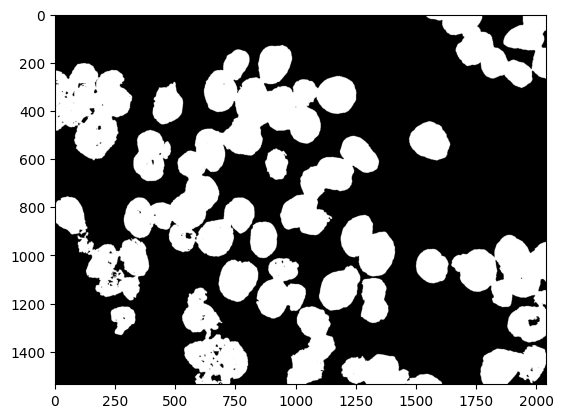

In [52]:
from skimage import morphology

#Remove small objects
only_large_blobs = morphology.remove_small_objects(binary_mask, 
                                                   min_size=8000)
plt.imshow(only_large_blobs, cmap='gray')


bool


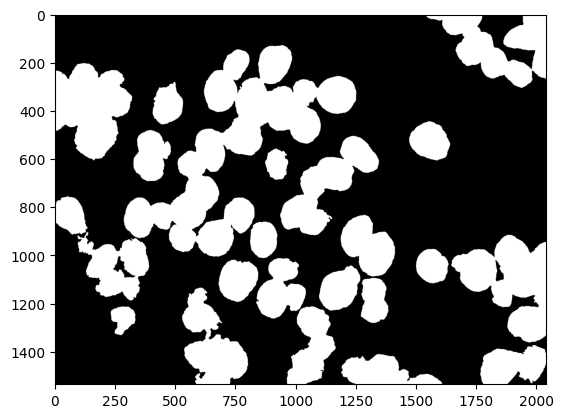

In [53]:
#filling pada foreground untuk menghilangkan objek hitam pada foreground
#Fill small holes
only_large = np.logical_not(morphology.remove_small_objects(
                                    np.logical_not(only_large_blobs), 
                                                   min_size=1200))
image_segmented = only_large
plt.imshow(image_segmented, cmap='gray')
print(image_segmented.dtype)

In [54]:
labels, nlabels = ndi.label(image_segmented)

label_arrays = []

print('There are {} separate components / objects detected.'.format(nlabels))


There are 23 separate components / objects detected.


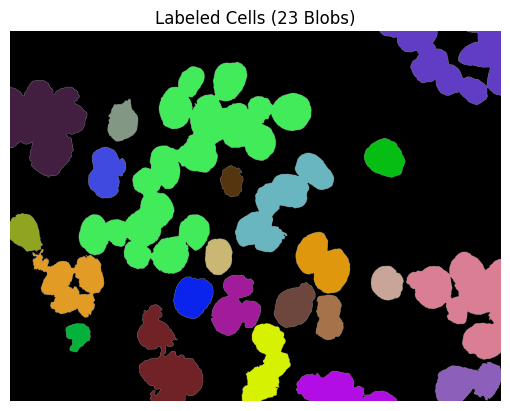

In [55]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(image_segmented, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Blobs)'.format(nlabels))
plt.show()


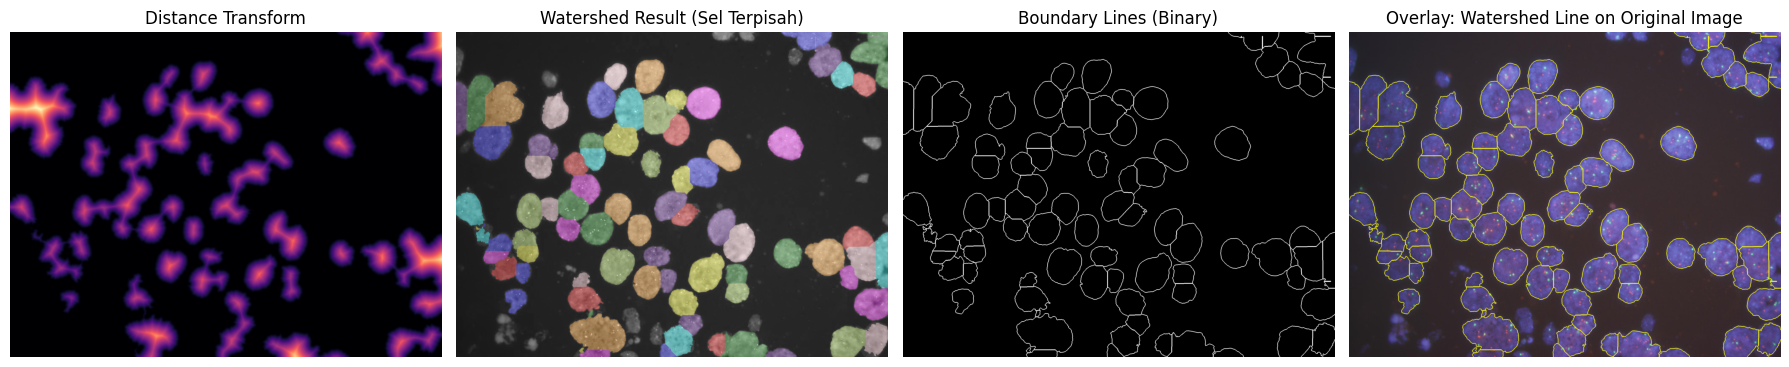

In [56]:
import numpy as np
from skimage import morphology, segmentation, feature, measure, color
from skimage.filters import gaussian
from scipy import ndimage as ndi
from skimage.segmentation import find_boundaries
from skimage.morphology import binary_dilation, disk
import matplotlib.pyplot as plt

def watershed_segmentation(image_segmented, image, sigma=1.5, min_distance=10, footprint_size=15, show_plot=True):
    """
    Melakukan segmentasi watershed pada mask biner dan menampilkan overlay garis kontur pada citra asli.

    Parameters:
    - image_segmented: binary mask dari segmentasi awal
    - image: citra RGB asli (float 0-1 atau uint8)
    - sigma: Gaussian blur untuk distance transform
    - min_distance: minimal jarak antar seed di peak_local_max
    - footprint_size: ukuran lokal pencarian seed
    - show_plot: jika True, tampilkan hasil visualisasi

    Returns:
    - labels_ws: hasil watershed (label per sel)
    - thick_boundaries: mask binary dari garis batas
    - image_with_lines: citra RGB dengan overlay garis batas merah
    """
    # Step 1: Distance transform & Gaussian smoothing
    distance = ndi.distance_transform_edt(image_segmented)
    distance_smooth = gaussian(distance, sigma=sigma)

    # Step 2: Cari koordinat seed (local maxima)
    coordinates = feature.peak_local_max(
        distance_smooth,
        labels=image_segmented,
        min_distance=min_distance,
        footprint=np.ones((footprint_size, footprint_size))
    )

    # Step 3: Buat mask seed
    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(coordinates.T)] = True

    # Step 4: Label markers
    markers = measure.label(local_maxi)

    # Step 5: Watershed segmentation
    labels_ws = segmentation.watershed(-distance, markers, mask=image_segmented)

    # Step 6: Buat boundary dan overlay
    boundaries = find_boundaries(labels_ws, mode='inner')
    thick_boundaries = binary_dilation(boundaries, disk(1))

    image_with_lines = image.copy()
    # Pastikan format RGB-nya benar untuk ditampilkan
    if image_with_lines.dtype != np.uint8:
        image_with_lines = (image_with_lines * 255).clip(0, 255).astype(np.uint8)
    image_with_lines[thick_boundaries] = [255, 255, 0]  # merah

    # Visualisasi jika diminta
    if show_plot:
        fig, axs = plt.subplots(1, 4, figsize=(18, 6))
        
        axs[0].imshow(distance, cmap='magma')
        axs[0].set_title('Distance Transform')
        axs[0].axis('off')

        axs[1].imshow(color.label2rgb(labels_ws, image=image, bg_label=0))
        axs[1].set_title("Watershed Result (Sel Terpisah)")
        axs[1].axis('off')

        axs[2].imshow(thick_boundaries, cmap='gray')
        axs[2].set_title("Boundary Lines (Binary)")
        axs[2].axis('off')

        axs[3].imshow(image_with_lines)
        axs[3].set_title("Overlay: Watershed Line on Original Image")
        axs[3].axis('off')

        plt.tight_layout()
        plt.show()

    return labels_ws, thick_boundaries, image_with_lines

labels_ws, lines_mask, overlay_img = watershed_segmentation(
    image_segmented=image_segmented,  # binary mask hasil segmentasi awal
    image=im,            # citra asli
    sigma=1.5,
    min_distance=20,
    footprint_size=15,
    show_plot=True
)


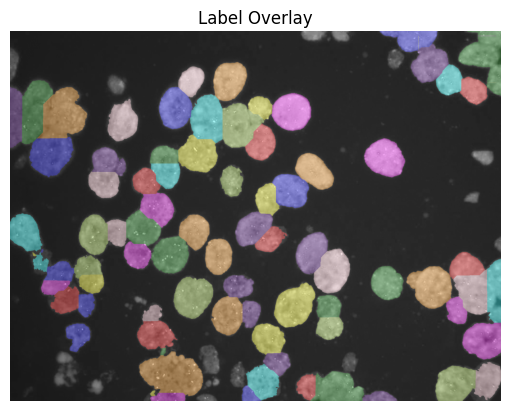

In [57]:
im_label = color.label2rgb(labels_ws, image=image, bg_label=0)
plt.imshow(im_label)
plt.title("Label Overlay")
plt.axis('off')
plt.show()


In [58]:
print("Jumlah objek (label):", labels_ws.max())


Jumlah objek (label): 86


**EVALUASI SEGMENTASI SEL DENGAN GROUND TRUTH DG METRICS DICE SIMILARITY DAN IoU**

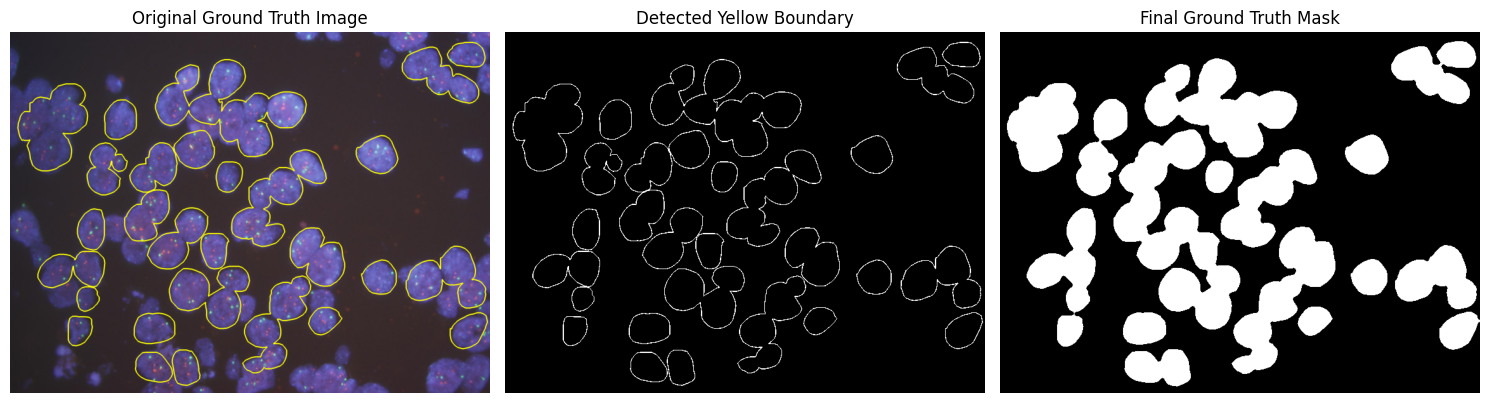

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_closing, binary_dilation, disk
from scipy.ndimage import binary_fill_holes
import matplotlib.pyplot as plt

# 1. Load gambar ground truth
gt_img = imread('REF_FISH3.png')  # ganti nama file sesuai
# gt_img = imread('REF_FISH1.png')
# gt_img = imread('REF_FISH2.png')
# gt_img = imread('REF_FISH4.png')
# gt_img = imread('REF_FISH5.png')
# 2. Buat mask kuning: R dan G tinggi, B rendah
r = gt_img[:, :, 0]
g = gt_img[:, :, 1]
b = gt_img[:, :, 2]

# Kondisi kuning (threshold bisa disesuaikan)
yellow_mask = (r > 200) & (g > 200) & (b < 100)

# 3. (Opsional) Tebalkan garis kuning agar area bisa tertutup sempurna
yellow_mask_dilated = binary_dilation(yellow_mask, disk(1))

# 4. Tutup area tertutup untuk membentuk mask area
closed = binary_closing(yellow_mask_dilated, disk(3))  # sesuaikan jika perlu
gt_mask = binary_fill_holes(closed)

# 5. Tampilkan hasil
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(gt_img)
plt.title('Original Ground Truth Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(yellow_mask, cmap='gray')
plt.title('Detected Yellow Boundary')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gt_mask, cmap='gray')
plt.title('Final Ground Truth Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

#####nanya lagi ini yg di evaluasi gambarnya lgsg apa segmentasi binarynya apa boundary linesnya


In [60]:
print("gt_mask shape     :", gt_img.shape)
print("labels_ws shape   :", overlay_img.shape)


gt_mask shape     : (570, 757, 4)
labels_ws shape   : (1536, 2040, 3)


In [61]:
from skimage.transform import resize

# Resize gt_mask ke ukuran labels_ws
gt_resized = resize(gt_img, overlay_img.shape, order=0, preserve_range=True, anti_aliasing=False).astype(bool)


In [62]:
y_true = gt_resized.flatten().astype(bool)
y_pred = (overlay_img > 0).flatten().astype(bool)

# IoU
from sklearn.metrics import jaccard_score
iou = jaccard_score(y_true, y_pred)

# Dice
intersection = np.logical_and(y_true, y_pred).sum()
dice = 2. * intersection / (y_true.sum() + y_pred.sum())

print(f"IoU : {iou:.4f}")
print(f"Dice: {dice:.4f}")


IoU : 0.9897
Dice: 0.9948


## **ANALISIS SEGMENTASI BERDASARKAN RATIO HER2 DAN CEN17 SIGNALS**

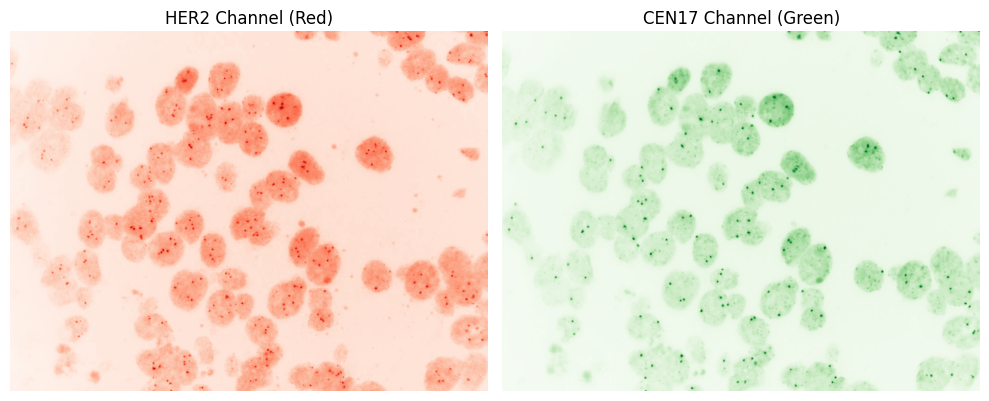

In [63]:
# Pastikan image RGB bertipe float 0-1
if im.dtype != np.float32 and im.dtype != np.float64:
    image_rgb = im / 255.0
else:
    image_rgb = im.copy()

# Ekstrak channel merah (HER2) dan hijau (CEN17)
her2_channel = image_rgb[:, :, 0]
cen17_channel = image_rgb[:, :, 1]

# Tampilkan channel
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(her2_channel, cmap='Reds')
plt.title("HER2 Channel (Red)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cen17_channel, cmap='Greens')
plt.title("CEN17 Channel (Green)")
plt.axis('off')
plt.tight_layout()
plt.show()


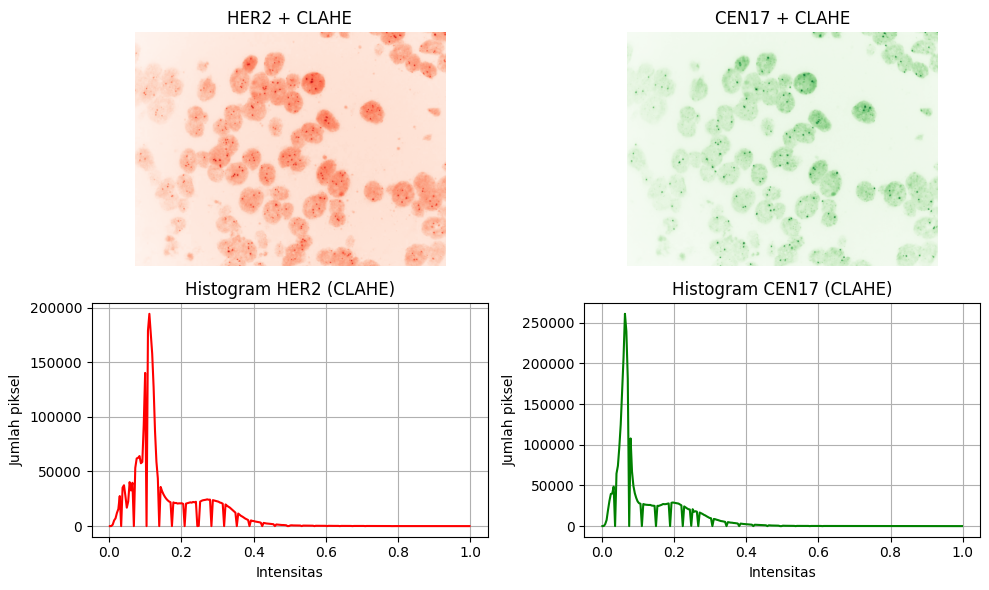

In [64]:
from skimage.exposure import equalize_adapthist, histogram
import matplotlib.pyplot as plt

# CLAHE untuk masing-masing channel
her2_clahe = equalize_adapthist(her2_channel, clip_limit=0.001)
cen17_clahe = equalize_adapthist(cen17_channel, clip_limit=0.003)

# Hitung histogram
hist_her2, bins_her2 = histogram(her2_clahe)
hist_cen17, bins_cen17 = histogram(cen17_clahe)

# Visualisasi gambar + histogram
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Gambar hasil CLAHE
axs[0, 0].imshow(her2_clahe, cmap='Reds')
axs[0, 0].set_title("HER2 + CLAHE")
axs[0, 0].axis('off')

axs[0, 1].imshow(cen17_clahe, cmap='Greens')
axs[0, 1].set_title("CEN17 + CLAHE")
axs[0, 1].axis('off')

# Histogram
axs[1, 0].plot(bins_her2, hist_her2, color='red')
axs[1, 0].set_title('Histogram HER2 (CLAHE)')
axs[1, 0].set_xlabel("Intensitas")
axs[1, 0].set_ylabel("Jumlah piksel")
axs[1, 0].grid(True)

axs[1, 1].plot(bins_cen17, hist_cen17, color='green')
axs[1, 1].set_title('Histogram CEN17 (CLAHE)')
axs[1, 1].set_xlabel("Intensitas")
axs[1, 1].set_ylabel("Jumlah piksel")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


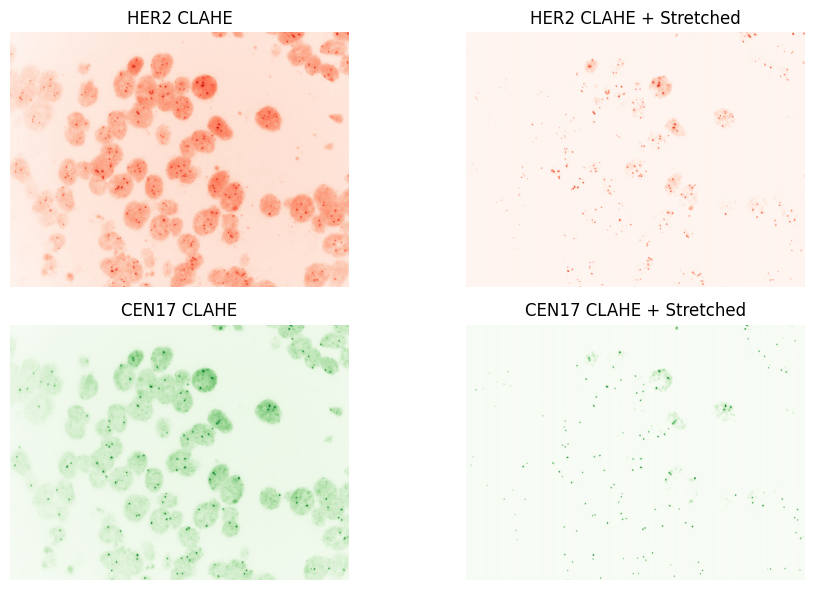

In [65]:
from skimage.exposure import rescale_intensity
from skimage.exposure import equalize_adapthist, histogram

# 1. CLAHE dulu
her2_clahe = equalize_adapthist(her2_channel, clip_limit=0.001)
cen17_clahe = equalize_adapthist(cen17_channel, clip_limit=0.003)

# 2. Rescale untuk menekan latar belakang → fokus ke titik terang
her2_stretched = rescale_intensity(her2_clahe, in_range=(0.33, 1.0))  # kamu bisa trial 0.2–0.4
cen17_stretched = rescale_intensity(cen17_clahe, in_range=(0.33, 1.0))

fig, axs = plt.subplots(2 , 2, figsize=(10, 6))

axs[0, 0].imshow(her2_clahe, cmap='Reds')
axs[0, 0].set_title("HER2 CLAHE")
axs[0, 0].axis('off')

axs[0, 1].imshow(her2_stretched, cmap='Reds')
axs[0, 1].set_title("HER2 CLAHE + Stretched")
axs[0, 1].axis('off')

axs[1, 0].imshow(cen17_clahe, cmap='Greens')
axs[1, 0].set_title("CEN17 CLAHE")
axs[1, 0].axis('off')

axs[1, 1].imshow(cen17_stretched, cmap='Greens')
axs[1, 1].set_title("CEN17 CLAHE + Stretched")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


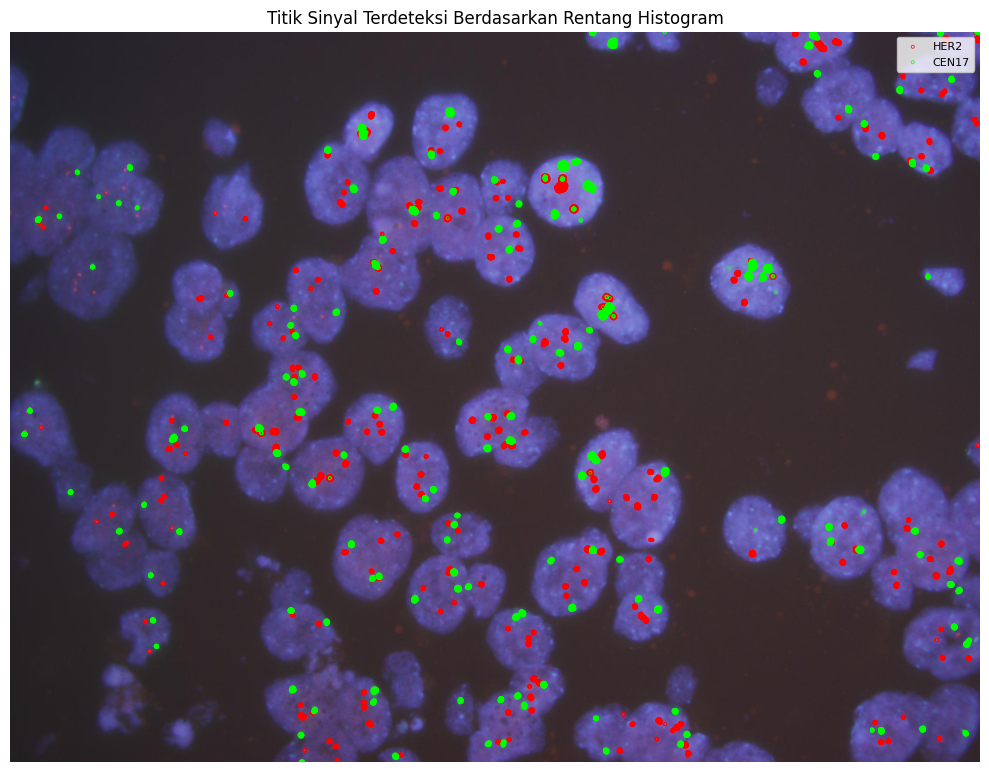

In [66]:
her2_thresh_min = 0.33
her2_thresh_max = 1.0

cen17_thresh_min = 0.33
cen17_thresh_max = 1.0
# Koordinat titik sinyal HER2 dan CEN17 dalam rentang
her2_coords = np.argwhere((her2_stretched >= her2_thresh_min) & (her2_clahe <= her2_thresh_max))
cen17_coords = np.argwhere((cen17_stretched >= cen17_thresh_min) & (cen17_clahe <= cen17_thresh_max))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)  # citra RGB asli

# HER2 scatter
if her2_coords.shape[0] > 0:
    ax.scatter(
        her2_coords[:, 1], her2_coords[:, 0],  # x, y
        s=5, facecolors='none', edgecolors='red', linewidths=0.5, label='HER2'
    )

# CEN17 scatter
if cen17_coords.shape[0] > 0:
    ax.scatter(
        cen17_coords[:, 1], cen17_coords[:, 0],  # x, y
        s=5, facecolors='none', edgecolors='lime', linewidths=0.5, label='CEN17'
    )

# Judul dan tampilan
ax.set_title("Titik Sinyal Terdeteksi Berdasarkan Rentang Histogram")
ax.axis('off')

# Legenda unik
handles, labels = ax.get_legend_handles_labels()
ax.legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys(), loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


In [67]:
from skimage.measure import regionprops

regions = regionprops(labels_ws)
print("Jumlah sel terdeteksi:", len(regions))


Jumlah sel terdeteksi: 86


In [68]:
import pandas as pd
from skimage.measure import regionprops

# Ambil semua region dari label watershed
regions = regionprops(labels_ws)

# Siapkan list hasil
region_ids = []
her2_counts = []
cen17_counts = []
ratios = []
statuses = []

# Buat peta label cepat
label_map = labels_ws

# Buat citra kosong dengan titik HER2 dan CEN17
her2_map = np.zeros_like(label_map, dtype=int)
cen17_map = np.zeros_like(label_map, dtype=int)

# Tandai piksel titik HER2 dan CEN17 dalam citra (langsung hitungable)
her2_map[her2_coords[:, 0], her2_coords[:, 1]] = 1
cen17_map[cen17_coords[:, 0], cen17_coords[:, 1]] = 1

# Loop untuk setiap sel hasil watershed
for region in regions:
    region_id = region.label
    coords = region.coords  # koordinat piksel sel ini

    # Ambil jumlah titik dalam region
    h_count = her2_map[coords[:, 0], coords[:, 1]].sum()
    c_count = cen17_map[coords[:, 0], coords[:, 1]].sum()

    # Hitung rasio
    ratio = h_count / c_count if c_count > 0 else 0

    # Klasifikasi status
    if ratio > 2.0:
        status = "HER2-Positive"
    elif 1.8 <= ratio <= 2.0:
        status = "Equivocal"
    else:
        status = "HER2-Negative"

    # Simpan ke list
    region_ids.append(region_id)
    her2_counts.append(h_count)
    cen17_counts.append(c_count)
    ratios.append(ratio)
    statuses.append(status)

# Buat DataFrame hasil
df_ratio = pd.DataFrame({
    "Region": region_ids,
    "HER2_Count": her2_counts,
    "CEN17_Count": cen17_counts,
    "HER2/CEN17_Ratio": ratios,
    "HER2_Status": statuses
})

pd.set_option('display.max_rows', None)  # tampilkan semua baris
display(df_ratio)  # untuk Jupyter
pd.reset_option('display.max_rows')

df_ratio[df_ratio['HER2_Status'] == 'HER2-Positive']


Region  HER2_Count  CEN17_Count  HER2/CEN17_Ratio    HER2_Status
0        1           0            0          0.000000  HER2-Negative
1        2         394          213          1.849765      Equivocal
2        3           7            0          0.000000  HER2-Negative
3        4           9            0          0.000000  HER2-Negative
4        5         294          166          1.771084  HER2-Negative
5        6          21          116          0.181034  HER2-Negative
6        7         120          197          0.609137  HER2-Negative
7        8         100           97          1.030928  HER2-Negative
8        9         306          247          1.238866  HER2-Negative
9       10           0            0          0.000000  HER2-Negative
10      11         122          126          0.968254  HER2-Negative
11      12         147          140          1.050000  HER2-Negative
12      13          57           98          0.581633  HER2-Negative
13      14         910          769          1.183355  HER2-Negative
14      15          28           67          0.417910  HER2-Negative
15      16           0            0          0.000000  HER2-Negative
16      17           1           62          0.016129  HER2-Negative
17      18         262          204          1.284314  HER2-Negative
18      19          13            0          0.000000  HER2-Negative
19      20         315          102          3.088235  HER2-Positive
20      21         185          189          0.978836  HER2-Negative
21      22           0           14          0.000000  HER2-Negative
22      23         212           99          2.141414  HER2-Positive
23      24         327          563          0.580817  HER2-Negative
24      25          50            0          0.000000  HER2-Negative
25      26          52           32          1.625000  HER2-Negative
26      27         403          373          1.080429  HER2-Negative
27      28           0           86          0.000000  HER2-Negative
28      29          13            0          0.000000  HER2-Negative
29      30          29           32          0.906250  HER2-Negative
30      31          51           92          0.554348  HER2-Negative
31      32         263          198          1.328283  HER2-Negative
32      33          89          180          0.494444  HER2-Negative
33      34         157          175          0.897143  HER2-Negative
34      35         436          184          2.369565  HER2-Positive
35      36         260          202          1.287129  HER2-Negative
36      37         178          120          1.483333  HER2-Negative
37      38           2           48          0.041667  HER2-Negative
38      39          29            0          0.000000  HER2-Negative
39      40          68          126          0.539683  HER2-Negative
40      41         175          105          1.666667  HER2-Negative
41      42           0            0          0.000000  HER2-Negative
42      43           0            0          0.000000  HER2-Negative
43      44          17           82          0.207317  HER2-Negative
44      45         333          122          2.729508  HER2-Positive
45      46         277          290          0.955172  HER2-Negative
46      47         160          149          1.073826  HER2-Negative
47      48           0           22          0.000000  HER2-Negative
48      49         292          115          2.539130  HER2-Positive
49      50          40           21          1.904762      Equivocal
50      51           0            0          0.000000  HER2-Negative
51      52          21            0          0.000000  HER2-Negative
52      53           2           34          0.058824  HER2-Negative
53      54           0           37          0.000000  HER2-Negative
54      55          71           66          1.075758  HER2-Negative
55      56          45          113          0.398230  HER2-Negative
56      57         208          238          0.873950  HER2-Negative
57

Region  HER2_Count  CEN17_Count  HER2/CEN17_Ratio    HER2_Status
19      20         315          102          3.088235  HER2-Positive
22      23         212           99          2.141414  HER2-Positive
34      35         436          184          2.369565  HER2-Positive
44      45         333          122          2.729508  HER2-Positive
48      49         292          115          2.539130  HER2-Positive
65      66          38           10          3.800000  HER2-Positive
75      76         166           67          2.477612  HER2-Positive
83      84          39           10          3.900000  HER2-Positive
84      85         305          143          2.132867  HER2-Positive

visualisasinya

In [69]:
from skimage.segmentation import find_boundaries
from skimage.color import label2rgb

boundaries = find_boundaries(labels_ws, mode='inner')
overlay_img = label2rgb(labels_ws, image=im, bg_label=0)


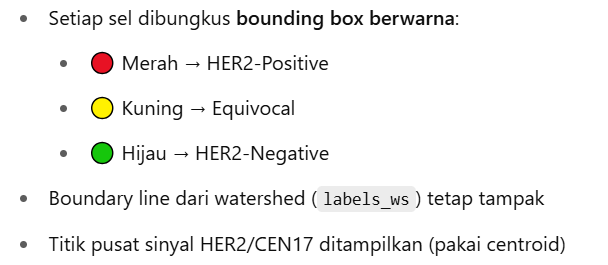

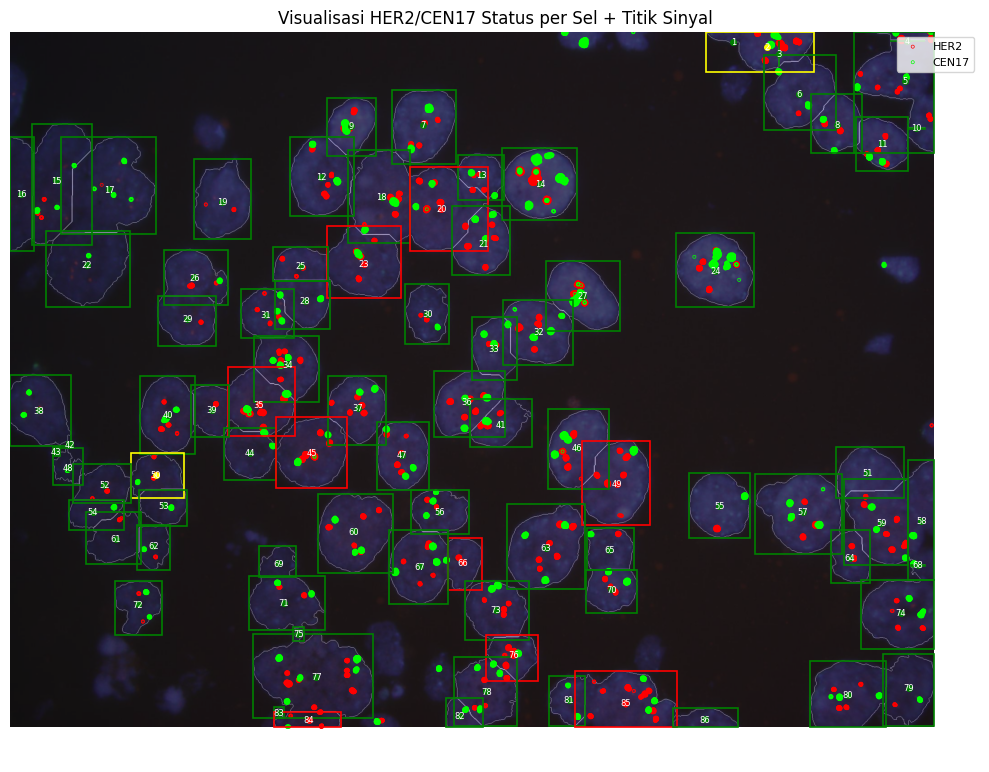

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Gunakan citra asli atau overlay sebagai dasar
ax.imshow(im)  # atau ganti dengan overlay_img jika mau pakai label RGB
ax.imshow(boundaries, cmap='gray', alpha=0.5)  # lebih ringan agar citra dasar tampak

# Visualisasi titik HER2 dan CEN17
if her2_coords.shape[0] > 0:
    ax.scatter(
        her2_coords[:, 1], her2_coords[:, 0],
        s=5, facecolors='none', edgecolors='red', linewidths=0.5, label='HER2'
    )

if cen17_coords.shape[0] > 0:
    ax.scatter(
        cen17_coords[:, 1], cen17_coords[:, 0],
        s=5, facecolors='none', edgecolors='lime', linewidths=0.5, label='CEN17'
    )

# Loop region untuk bounding box & status label
for i, region in enumerate(regions):
    minr, minc, maxr, maxc = region.bbox
    cy, cx = region.centroid

    # Ambil status klasifikasi dari DataFrame
    status = df_ratio.loc[df_ratio["Region"] == region.label, "HER2_Status"].values[0]

    color_box = {
        'HER2-Positive': 'red',
        'Equivocal': 'yellow',
        'HER2-Negative': 'green'
    }[status]

    # Gambar bounding box
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor=color_box, linewidth=1.2)
    ax.add_patch(rect)

    # Titik centroid
    ax.plot(cx, cy, 'o', color=color_box, markersize=4)

    # Nomor region
    ax.text(cx, cy, f'{region.label}', color='white', fontsize=6, ha='center', va='center')

# Legend dan tampilan akhir
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8)

ax.set_title("Visualisasi HER2/CEN17 Status per Sel + Titik Sinyal")
ax.axis('off')
plt.tight_layout()
plt.show()
